In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


HTTPError: HTTP Error 404: Not Found

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [ ]:
# 판다스 df의 describe 함수를 사용해 각 열에 대한 기술 통계 계산
stats = df.describe().round(2)
print(type(stats))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#loc : 인덱스 기준으로 행 데이터 읽기
# 아래처럼 쓰면 새 행을 만들고 각 열의 min 값에서 max 값을 뺀 값을 저장
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
# 각 열에 대한 분산 계산
stats.loc['var'] = df.var().round(2)
# 각 열에 대한 왜도 계산
stats.loc['skew'] = df.skew().round(2)
# 각 열에 대한 첨도 계산
stats.loc['kurtosis'] = df.kurtosis().round(2)

print(stats)

          fixed acidity  volatile acidity  citric acid  residual sugar  \
count           1599.00           1599.00      1599.00         1599.00   
mean               8.32              0.53         0.27            2.54   
std                1.74              0.18         0.19            1.41   
min                4.60              0.12         0.00            0.90   
25%                7.10              0.39         0.09            1.90   
50%                7.90              0.52         0.26            2.20   
75%                9.20              0.64         0.42            2.60   
max               15.90              1.58         1.00           15.50   
range             11.30              1.46         1.00           14.60   
var                3.03              0.03         0.04            1.99   
skew               0.98              0.67         0.32            4.54   
kurtosis           1.13              1.23        -0.79           28.62   

          chlorides  free sulfur diox

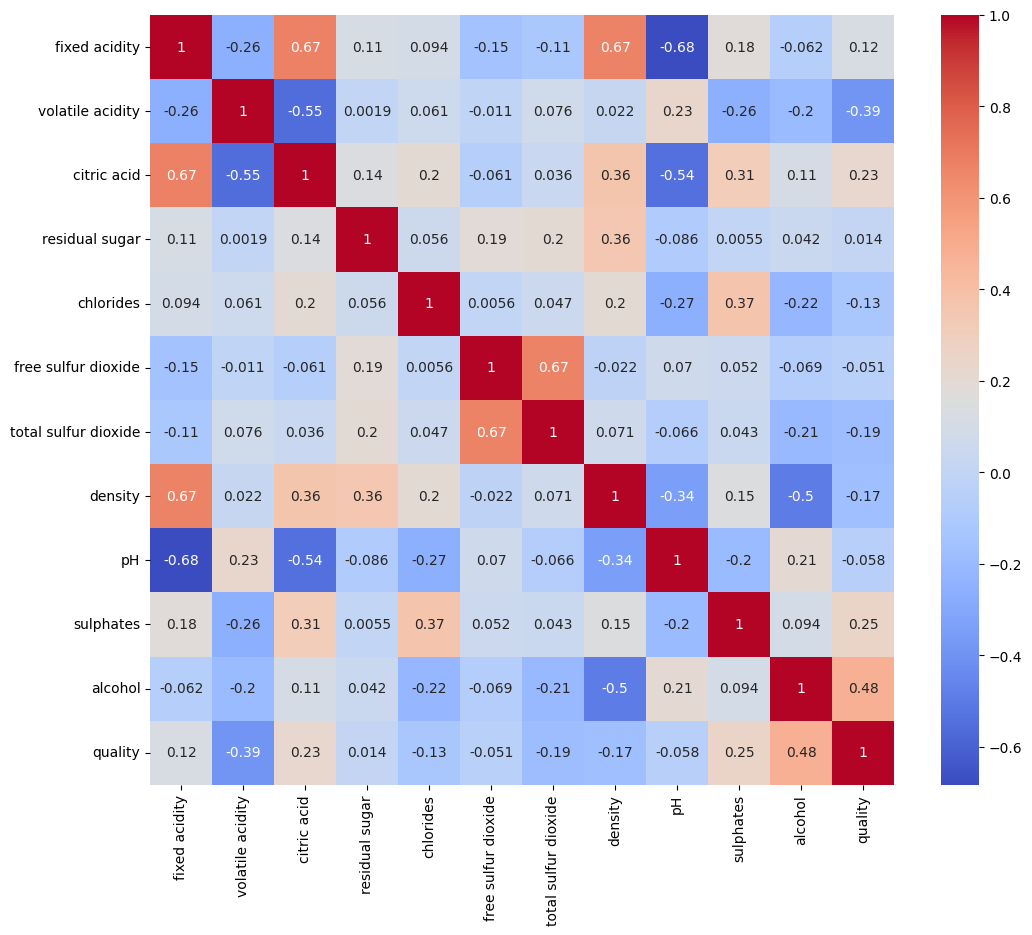

In [ ]:
corr= df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# 알콜 함량-와인 품질 음의 상관성, 휘발성 산도-와인 품질 : 음의 상관성

In [ ]:
## 109 페이지 / 일표본 t-검정
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp

In [ ]:
heights = [165, 170, 175, 180, 165, 170, 165, 175, 170, 175, 180, 180, 165, 170, 170, 175, 170, 170, 175, 180]

In [ ]:
sample_mean = np.mean(heights)
print("mean : ", sample_mean)

# 일표본 t-검정 수행. 전국 학생의 평균 키가 175cm라고 가정하고, 표본 평균이 모집단 평균과 유의하게 다른지 확인하기 위해 일표본 t-검정
t_statistic, p_value = ttest_1samp(heights, 175)
print("t-statistic:",t_statistic)
print("p-value", p_value)

# mean :  172.25
# t-statistic: -2.3424076306982147
# p-value 0.03020119503702702

# t-검정통계량 : 표본 평균과 모집단 평균의 차이를 표준 오차 단위로 측정한 값

mean :  172.25
t-statistic: -2.3424076306982147
p-value 0.03020119503702702


In [ ]:
## 110 페이지 / 이표본 t-검정
import numpy as np
# seed(숫자)는 무작위로 나오는 숫자의 결과를 특정한 값으로 고정
np.random.seed(14)

# 평균 160, 표준편차 10, 30개 데이터 랜덤 생성
group_a_heights = np.random.normal(160, 10, 30)
group_b_heights = np.random.normal(170, 8, 25)

In [ ]:
print(group_a_heights)
print(group_b_heights)

[175.51339111 160.79186025 161.73976528 159.27663434 139.956706
 161.44677813 144.98831378 162.11109451 154.41794945 170.84529065
 158.13710876 160.14661375 149.24430531 166.42252074 158.19663289
 166.20300253 168.10974335 167.77935866 157.62510322 141.08087655
 148.27878206 168.36206971 170.092734   172.93099361 154.50668834
 150.18287135 169.14672758 168.73070378 160.22111142 159.95856416]
[159.2069908  168.33425723 180.61232228 162.66991536 166.23989483
 168.80445984 167.39791907 155.55421235 165.99703849 165.48175484
 167.48457142 166.8265821  170.0474649  162.02289403 183.52878067
 167.46847303 181.72107537 181.70881068 171.03129063 160.57405711
 152.66792633 157.82549698 167.65689789 171.28390616 163.73719178]


In [ ]:
from scipy.stats import ttest_ind

#two-sampe t-test
t_stat, p_val = ttest_ind(group_a_heights, group_b_heights)

print("T-statistics:", t_stat)
print("P-value:", p_val)

# T-statistics: -3.069892982872516
# P-value: 0.0033731880990274534

# 두 그룹의 키에 통계적으로 유의미한 차이가 있다


T-statistics: -3.069892982872516
P-value: 0.0033731880990274534


In [ ]:
# 111p, 대응표본 t-검정(paried sample t-test)
import numpy as np
from scipy.stats import ttest_rel

#훈련 프로그램 전후의 점수
before_scores = np.array([62, 75, 85, 79, 67, 74, 80, 60, 65, 72])
after_scores = np.array([72, 78, 91, 85, 70, 80, 88, 65, 70, 82])

t_stat, p_val = ttest_rel(before_scores, after_scores)
print("t-statistic:", t_statistic)
# f : f-string 포맷, 중괄호({}) 안의 변수를 내가 원하는 방식으로 출력할 때 사용. p_val:0.5f 에서 0.5f는 p_val 변수를 소수점 아래 다섯 자리로 포매팅하여 출력하라는 의미
print(f"p-값:{p_val:0.5f}")

# t-검정통계량은 쌍을 이룬 관측값간의 평균 차이가 0에서 얼마나 떨어져있는지 나타내는 표준 오차 측정값.
# t-statistic: -2.3424076306982147
# p-값:0.00002

t-statistic: -2.3424076306982147
p-값:0.00002


In [ ]:
# 113페이지, 카이제곱검정 (chi-squared test)
# 광고 캠페인 전후에 100명의 고객 대상으로 설문조사 실시해 선호비율에 유의미한 차이 있는지 확인

import numpy as np
# 각 변수의 범주를 동시에 갖는 관측값의 수를 분할표로 만듬
from scipy.stats import chi2_contingency

In [ ]:
before = np.array([35, 65])
after = np.array([55,45])

observed = np.array([before, after])

chi2_statistic, p_value, dof, expected = chi2_contingency(observed)
print("chi-제곱통계", chi2_statistic)
print("p-값", p_value)

#chi-제곱통계 7.292929292929292
#p-값 0.006922651100971638

chi-제곱통계 7.292929292929292
p-값 0.006922651100971638


In [ ]:
# 114 페이지, 분산분석검정 (ANOVA)
import scipy.stats as stats

# define the data
group_a = [10, 12, 13, 14, 15]
group_b = [12, 13, 14, 15, 16]
group_c = [14, 15, 16, 17, 18]

#perform the ANOVA test
# F-검정통계량 : 높이 변화 중 얼마나 많은 부분이 그룹 간의 차이로 인한 것인지, 얼마나 많은 부분이 그룹 내의 차이로 인한 것인지. F-검정통계량이 충분히 크면 그룹의 평균에 유의미한 차이가 있다는 결론을 내릴 수 있음.
# 충분히 크다는게 어떤지 모르겠음
f_statistic, p_val = stats.f_oneway(group_a, group_b, group_c)

print("f statistic:", f_statistic)
print("p-value : ",p_value)

# result
# f statistic: 4.5057471264367805
# p-value :  0.006922651100971638

f statistic: 4.5057471264367805
p-value :  0.006922651100971638


In [ ]:
# 120페이지 단순회귀분석, 다중회귀분석
import statsmodels.formula.api as smf

# create a dataframe with the dependent variable and independent variables
data = {'exam_score': [85, 72, 90, 65, 78, 87, 92, 80, 75, 84],
        'num_tutors':[1,2,3,1,2,3,1,2,3,1],
        'family_wealth':[50000,75000,100000, 30000, 50000, 70000, 100000, 80000, 60000, 90000]}

df = pd.DataFrame(data)

# 시험점수를 종속변수로, 학원개수를 독립변수 하나로 넣었을 때
# smf.ols : 최소제곱법이라는 선형회귀분석 방법 사용
# fit() : 모델을 fitting 하는 함수. 이를 통해 모델이 데이터에 적합하도록 계수 추정
model = smf.ols('exam_score ~ num_tutors', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.113
Method:                 Least Squares   F-statistic:                   0.08391
Date:                Mon, 01 Apr 2024   Prob (F-statistic):              0.779
Time:                        06:47:41   Log-Likelihood:                -34.975
No. Observations:                  10   AIC:                             73.95
Df Residuals:                       8   BIC:                             74.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.9275      7.055     11.188      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# 시험 점수와 학원개수와 재산과의 관계를 보기 위한 분석
#Fit a multiple linear regression model
model = smf.ols('exam_score ~ num_tutors + family_wealth', data=df).fit()

#print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     3.972
Date:                Mon, 01 Apr 2024   Prob (F-statistic):             0.0703
Time:                        06:56:50   Log-Likelihood:                -31.235
No. Observations:                  10   AIC:                             68.47
Df Residuals:                       7   BIC:                             69.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        62.2891      7.903      7.881

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# 페이지 130, 로지스틱 회귀 분석
import numpy as np
import pandas as pd
# 사이킷런 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# create a dataset with two variables
np.random.seed(42)
time_studied = np.random.randint(0,10,1000)
avg_sleep_hours = np.random.uniform(4,10,1000)
passing = np.random.binomial(1,1 / (1+np.exp(-time_studied + 2 * avg_sleep_hours - 10))) # sigmoid function
df = pd.DataFrame({'time_studied':time_studied, 'avg_sleep_hours':avg_sleep_hours,'passing': passing})

In [ ]:
# split the dataset into training and testing sets
X = df[['time_studied', 'avg_sleep_hours']]
y = df['passing']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
# fit logistic regression models with one and two variables
model1 = LogisticRegression()
model1.fit(X_train[['time_studied']], y_train)

model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred1 = model1.predict(X_test[['time_studied']])
y_pred2 = model2.predict(X_test)

In [ ]:
# calculate accuracy and confusion matrix
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)


In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

In [ ]:
#calculate ROC curve and AUC score
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test[['time_studied']])[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, model2.predict_proba(X_test)[:,1])

auc1 = roc_auc_score(y_test, model1.predict_proba(X_test[['time_studied']])[:,1])
auc2 = roc_auc_score(y_test, model2.predict_proba(X_test)[:,1])


In [43]:
print('Model with time studied only:')
print('Accuracy:', accuracy1)
print('Confusion Matrix:', cm1)
print('AUC:', auc1)

print('Model with time studied and avg_sleep_hours:')
print('Accuracy:', accuracy2)
print('Confusion Matrix:', cm2)
print('AUC:', auc2)



# 랜덤포레스트, 페이지 136
from sklearn.ensemble import RandomForestClassifier

# n_estimators : 랜덤포레스트에 포함될 의사결정 트리의 수
# max_depth = 5 (각 의사결정 트리의 최대 깊이)
# random_state = 42 (무작위 시드 값)

model3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model3.fit(X_train, y_train)
predictions = model3.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
fpr3, tpr3, thresholds3 = roc_curve(y_test, model3.predict_proba(X_test)[:,1])

print('Random Forest Accuracy:', accuracy )

Model with time studied only:
Accuracy: 0.7266666666666667
Confusion Matrix: [[ 83  48]
 [ 34 135]]
AUC: 0.7884050770134152
Model with time studied and avg_sleep_hours:
Accuracy: 0.8933333333333333
Confusion Matrix: [[118  13]
 [ 19 150]]
AUC: 0.9595736031437735
Accuracy: 0.8933333333333333


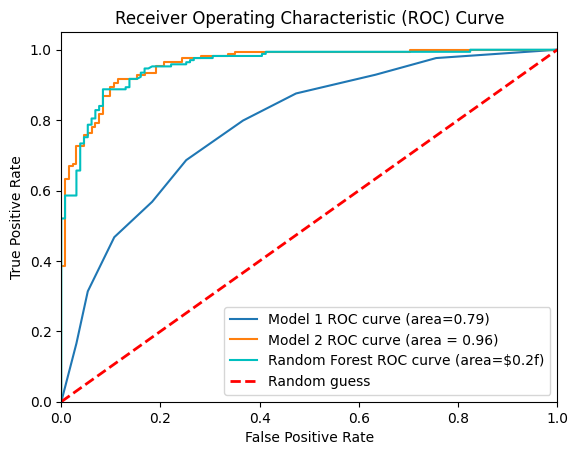

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC curve for the model with only "study hours"
roc_auc1 = auc(fpr1, tpr1)

plt.plot(fpr1, tpr1, label = 'Model 1 ROC curve (area=%0.2f)' % roc_auc1)

#ROC curve for the model with "study hours" and "sleep hours"
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr2, tpr2, label='Model 2 ROC curve (area = %0.2f)' % roc_auc2)

# add random forest plot
roc_rdf = auc(fpr3, tpr3)
plt.plot(fpr3, tpr3, label='Random Forest ROC curve (area=$0.2f)' % roc_rdf, color='c')

# Random guess line
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='r', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()